In [ ]:
# LLE Using Sklearn Packages

# 패키지

In [99]:
from sklearn.manifold import LocallyLinearEmbedding
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import torch
import torchvision.transforms as transforms

from PIL import Image
import cv2

# 데이터 셋 불러오기 

In [45]:
# 데이터 셋 불러오기

Data_set = pd.read_csv('/content/mnist_test.csv')

In [46]:
# 각 Lable로 100개의 클래스만 뽑고 Concat

Label_set = [str(i) for i in range(0,10)]
for Label in Label_set:
  globals()['label_'+str(Label)] = []
  for i in range(len(Data_set)):
    if Data_set.iloc[i,0] == int(Label):
      globals()['label_'+str(Label)].append(i)
    if len(globals()['label_'+str(Label)]) == 100:
      break 

new_Data_set = pd.DataFrame([], columns = Data_set.columns)

for i in range(10):  
  globals()['DataFrame_'+str(i)] = Data_set.iloc[globals()['label_'+str(i)],:]
  #print(globals()['DataFrame_'+str(i)])
  new_Data_set= pd.concat([new_Data_set, globals()['DataFrame_'+str(i)]])

new_Data_set = new_Data_set.reset_index(drop=True)

#     
Data = new_Data_set.iloc[:,1:].values

In [79]:
len(new_Data_set)

1000

# LLA

In [50]:
# LocallyLinearEmbedding
y = LocallyLinearEmbedding(n_components=2, n_neighbors=5).fit_transform(Data)


# LocallyLinearEmbedding -> 3차원 Plotting 
y2 = LocallyLinearEmbedding(n_components=3, n_neighbors=5).fit_transform(Data)

In [87]:
B = pd.DataFrame(y)
B['Label'] = new_Data_set.iloc[:,0].values
label = B['Label'].unique()

B2 = pd.DataFrame(y2)
B2['Label'] = new_Data_set.iloc[:,0].values

In [94]:
Label0 = B[B['Label']==0]
Label1 = B[B['Label']==1]
Label2 = B[B['Label']==2]
Label3 = B[B['Label']==3]
Label4 = B[B['Label']==4]
Label5 = B[B['Label']==5]
Label6 = B[B['Label']==6]
Label7 = B[B['Label']==7]
Label8 = B[B['Label']==8]
Label9 = B[B['Label']==9]

Label02 = B2[B2['Label']==0]
Label12 = B2[B2['Label']==1]
Label22 = B2[B2['Label']==2]
Label32 = B2[B2['Label']==3]
Label42 = B2[B2['Label']==4]
Label52 = B2[B2['Label']==5]
Label62 = B2[B2['Label']==6]
Label72 = B2[B2['Label']==7]
Label82 = B2[B2['Label']==8]
Label92 = B2[B2['Label']==9]


# 시각화

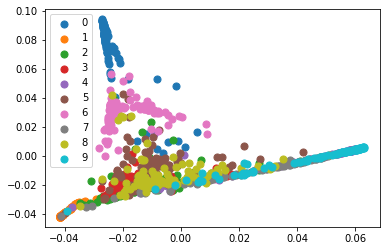

In [96]:
# 2차원
plt.figure()  
plt.scatter(Label0.iloc[:,0],Label0.iloc[:,1],s=50, label='0')
plt.scatter(Label1.iloc[:,0],Label1.iloc[:,1],s=50, label='1')
plt.scatter(Label2.iloc[:,0],Label2.iloc[:,1],s=50, label='2')
plt.scatter(Label3.iloc[:,0],Label3.iloc[:,1],s=50, label='3')
plt.scatter(Label4.iloc[:,0],Label4.iloc[:,1],s=50, label='4')
plt.scatter(Label5.iloc[:,0],Label5.iloc[:,1],s=50, label='5')
plt.scatter(Label6.iloc[:,0],Label6.iloc[:,1],s=50, label='6')
plt.scatter(Label7.iloc[:,0],Label7.iloc[:,1],s=50, label='7')
plt.scatter(Label8.iloc[:,0],Label8.iloc[:,1],s=50, label='8')
plt.scatter(Label9.iloc[:,0],Label9.iloc[:,1],s=50, label='9')
plt.legend()

plt.show()

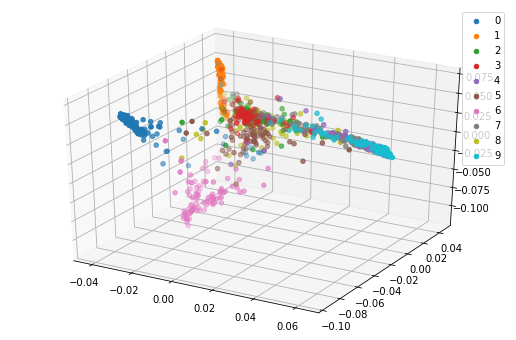

In [98]:
# 3차원

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Label02.iloc[:,0],Label02.iloc[:,1], Label02.iloc[:,2],label='0')
ax.scatter(Label12.iloc[:,0],Label12.iloc[:,1], Label12.iloc[:,2],label='1')
ax.scatter(Label22.iloc[:,0],Label22.iloc[:,1], Label22.iloc[:,2],label='2')
ax.scatter(Label32.iloc[:,0],Label32.iloc[:,1], Label32.iloc[:,2],label='3')
ax.scatter(Label42.iloc[:,0],Label42.iloc[:,1], Label42.iloc[:,2],label='4')
ax.scatter(Label52.iloc[:,0],Label52.iloc[:,1], Label52.iloc[:,2],label='5')
ax.scatter(Label62.iloc[:,0],Label62.iloc[:,1], Label62.iloc[:,2],label='6')
ax.scatter(Label72.iloc[:,0],Label72.iloc[:,1], Label72.iloc[:,2],label='7')
ax.scatter(Label82.iloc[:,0],Label82.iloc[:,1], Label82.iloc[:,2],label='8')
ax.scatter(Label92.iloc[:,0],Label92.iloc[:,1], Label92.iloc[:,2],label='9')
plt.legend()
plt.show()